In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (14,14))

news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

# preprocessing

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

text = news_df['키워드']


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).toarray()

nor = Normalizer()
norvec = nor.fit_transform(vec)

# K-means Clustering

In [4]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=12, max_iter=100, random_state=10) 

kmeans.fit(norvec)

KMeans(max_iter=100, n_clusters=12, random_state=10)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
pca_c = pca.fit_transform(norvec)
pca_df = pd.DataFrame(data=pca_c, columns = ['component 0', 'component 1'])

labels = kmeans.labels_

pca_df['군집'] = labels

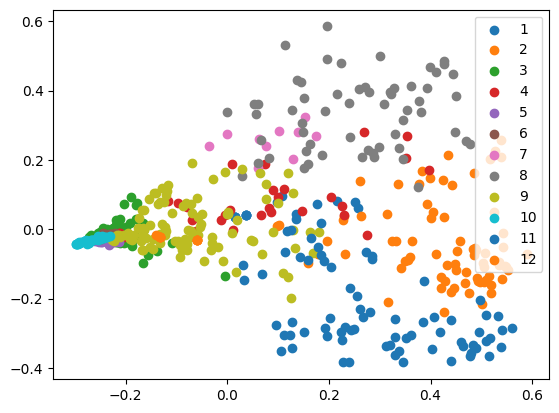

In [8]:
fig, ax = plt.subplots()

groups = pca_df.groupby('군집')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

In [10]:
from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=2) 
svd_c = svd.fit_transform(norvec)
svd_df = pd.DataFrame(data=svd_c, columns = ['component 0', 'component 1'])

labels = kmeans.labels_

svd_df['군집'] = labels

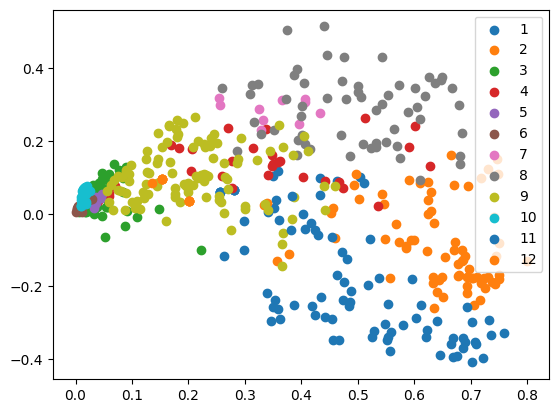

In [12]:
fig, ax = plt.subplots()

groups = svd_df.groupby('군집')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(norvec)

tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])

labels = kmeans.labels_

tsne_df['군집'] = labels

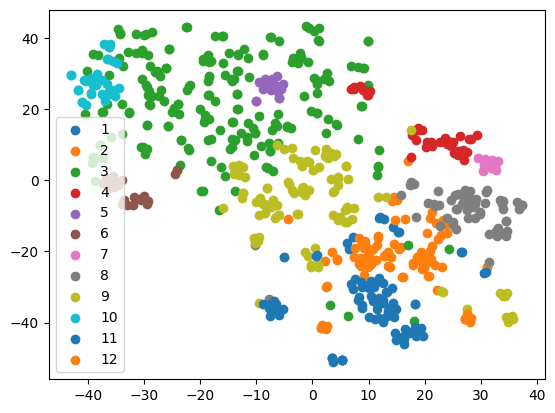

In [16]:
fig, ax = plt.subplots()

groups = tsne_df.groupby('군집')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()